---
# Cairo University Faculty of Engineering
## Deep Learning 
## Assignment 2

---

Please write your full name here
- **Name** : "Muhammed Elmasry"

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from d2l import tensorflow as d2l
import pandas as pd
import math

from sklearn.datasets import make_blobs  #To generate artificial data
from keras.optimizers import SGD
from keras.utils import to_categorical

# Part 1 Computational Graphs


## Example
Suppose that we have a function of the form: $f(x,y) = \sigma(x) + (x-y)^2$

**SHOW YOUR WORK**

0. **Draw its computational graph with a minimum of 4 operations inside it. Name your intermediate variables and upload a picture of your graph**

- Your Answer:
    - ![Answer](http://drive.google.com/uc?export=view&id=1gdhFYy_DOmapsGNN1HWq4wm-XNUbWSAS)

1. **Compute the forward path for this function. Use intermediate variables you identified in your graph**

- f --> final output
- Upload a a picture of your graph

- Your Answer:
    - ![Answer](http://drive.google.com/uc?export=view&id=1t4Q_sPTW14JwqW1pV3hUg8tmZOxUyl3_)
    


2. **Compute the backward path for this function to get:**
$$
\nabla f(x,y) = [ \frac{\partial f}{\partial y}, \frac{\partial f}{\partial x} ]
$$

- Upload a a picture of your graph
- **Use intermediate variables**
- **Write df/dy and df/dx**
- *Hint: Gradients add up at forks. This follows the multivariable chain rule in Calculus, which states that if a variable branches out to different parts, then the gradients that flow back to it will add.*

- Your Answer:
    - ![Answer](http://drive.google.com/uc?export=view&id=1zEPyDSYapJvKm8rcjcTW0zZe40zD5ftS)
    

Links of the images in case it didn't open properly :-

https://drive.google.com/file/d/1gdhFYy_DOmapsGNN1HWq4wm-XNUbWSAS/view?usp=share_link
    
https://drive.google.com/file/d/1t4Q_sPTW14JwqW1pV3hUg8tmZOxUyl3_/view?usp=share_link
    
https://drive.google.com/file/d/1zEPyDSYapJvKm8rcjcTW0zZe40zD5ftS/view?usp=share_link

# Part 2: Regression

In this part, (**we will implement the entire linear regression method from scratch,
including the data pipeline, the model,
the loss function, and the minibatch stochastic gradient descent optimizer.**)
You will rely only on tensors and auto differentiation.


we will use $n$ to denote
the number of examples in our dataset.
We index the data examples by $i$, denoting each input
as $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$
and the corresponding label as $y^{(i)}$.


**Linear Model**

When our inputs consist of $d$ features,
we express our prediction $\hat{y}$ (in general the "hat" symbol denotes estimates) as

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$


We will often find it convenient
to refer to features of our entire dataset of $n$ examples
via the *design matrix* $\mathbf{X} \in \mathbb{R}^{n \times d}$.
Here, $\mathbf{X}$ contains one row for every example
and one column for every feature.

For a collection of features $\mathbf{X}$,
the predictions $\hat{\mathbf{y}} \in \mathbb{R}^n$
can be expressed via the matrix-vector product:

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b,$$


**Loss Function**

When our prediction for an example $i$ is $\hat{y}^{(i)}$
and the corresponding true label is $y^{(i)}$,
the squared error is given by:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

To measure the quality of a model on the entire dataset of $n$ examples,
we simply average (or equivalently, sum)
the losses on the training set.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

When training the model, we want to find parameters ($\mathbf{w}^*, b^*$)
that minimize the total loss across all training examples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$


**Minibatch Stochastic Gradient Descent**

We can express the update mathematically as follows
($\partial$ denotes the partial derivative):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$


## Synthetic Data, Simple Model
### Generating the Dataset

To keep things simple, we will [**construct an artificial dataset
according to a linear model with additive noise.**]

In the following code snippet, we generate a dataset
containing 1000 examples, each consisting of 2 features
sampled from a standard normal distribution.
Thus our synthetic dataset will be a matrix
$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.

(**The true parameters generating our dataset will be
$\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$,
and**) our synthetic labels will be assigned according
to the following linear model with the noise term $\epsilon$:

(**$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$**)

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [3]:
tf.random.set_seed(5)
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.18030666 -0.95028627], shape=(2,), dtype=float32) 
label: tf.Tensor([7.0726256], shape=(1,), dtype=float32)


By generating a scatter plot using the second feature `features[:, 1]` and `labels`,
we can clearly observe the linear correlation between the two.


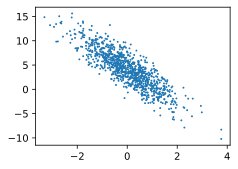

In [5]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

### Reading the Dataset

In the following code [**call upon the existing API in a framework to read data.**]
We pass in `features` and `labels` as arguments and specify `batch_size`
when instantiating a data iterator object.
Besides, the boolean value `is_train`
indicates whether or not
we want the data iterator object to shuffle the data
on each epoch (pass through the dataset).


1. **Use the tf function from_tensor_slices to generate a tf dataset object with batch_size as input**
2. **Use is_train flag to determine whether to shuffle the dataset or not**

In [6]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a TensorFlow data iterator."""
    #### YOUR CODE HERE ###
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    dataset = dataset.batch(batch_size)
    if(is_train):
        dataset  = dataset.shuffle(buffer_size = labels.shape[0])
        
    return dataset

In [7]:
batch_size = 10
data_iter = iter(load_array((features, labels), batch_size))

3. **Use `iter` to construct a Python iterator and use `next` to obtain the first item from the iterator.**


In [8]:
### YOUR CODE HERE ###
data_iter.next()

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[ 1.3564043e+00, -5.4133570e-01],
        [-1.0421329e+00,  2.0101453e-01],
        [-5.7323533e-01,  9.6179819e-01],
        [ 9.9003541e-01, -1.0166390e+00],
        [-2.7223310e-01, -4.9159122e-01],
        [-8.1928289e-01, -9.0086297e-04],
        [-2.0796096e+00,  8.4328723e-01],
        [ 3.0477965e-01,  2.0460723e-01],
        [ 1.1995399e+00,  2.9454825e+00],
        [-5.4580241e-01, -6.5089208e-01]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 8.755783  ],
        [ 1.4219627 ],
        [-0.21046317],
        [ 9.629394  ],
        [ 5.3383512 ],
        [ 2.5792086 ],
        [-2.8150222 ],
        [ 4.1173363 ],
        [-3.4104102 ],
        [ 5.3102717 ]], dtype=float32)>)

4. **Explain what the output shape in the prvious tensors means:**


**Answer:** the output shape is a tuple cosisting of the feature and the label, each of them has 10 rows which is the batch size (the number of examples each iteration), the first element in the tuple has 2 columns which is the number of feature, and the second has only 1 column as it's the output label

5. **How many TOTAL batches can be generated by **ENTIRE** data_iter ?** --> batches in data

**Answer:**  100 batches, which is the total number of examples / batch size

### Initializing Model Parameters

6. **Initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0.**

Note: For the shapes of the weights and bias, look at the generating a dataset part


In [9]:
## YOUR CODE HERE ##
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01))
b = tf.Variable(tf.zeros(1))

### Defining the Model

7. [**define our model, relating its inputs and parameters to its outputs.**]

In [10]:
def linreg(X, w, b):  
    """The linear regression model."""
    ## YOUR CODE HERE ##
    model = tf.matmul(X, w) + b
    return model

### Defining the Loss Function

8. (**define the loss function**): the squared loss function
as described in Loss Function definition above.

Note: In the implementation, you need to transform the true value `y`
into the predicted value's shape `y_hat`.
The result returned by the following function
will also have the same shape as `y_hat`.


In [11]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    ## YOUR CODE HERE ##
    return 0.5*(tf.reshape(y, y_hat.shape) - y_hat)**2

### Defining the Optimization Algorithm

At each step, using one minibatch randomly drawn from our dataset,
we will estimate the gradient of the loss with respect to our parameters.
Next, we will update our parameters
in the direction that may reduce the loss.

9. **Filll in the missing function below to apply the minibatch stochastic gradient descent update, given a set of parameters, a learning rate, and a batch size.**

Note: use assign_sub


In [12]:
def sgd(params, grads, lr, batch_size):  
    """Minibatch stochastic gradient descent."""
    ## YOUR CODE HERE ##
    for param, grad in zip(params, grads):
        param.assign_sub( (lr * grad) / batch_size)

### Training

10. **Implement the following loop**

* For each epoch :
    * Initialize parameters $(\mathbf{w}, b)$
    * Repeat until done
        * Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
        * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$
    * Print the loss at the end of each epoch

In each *epoch*,
we will iterate through the entire dataset
(using the `data_iter` function) once
passing through every example in the training dataset
.


Set the number of epochs `num_epochs` and the learning rate `lr` to 3 and 0.03, respectively.

In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [14]:
## YOUR CODE HERE ##
for epoch in range(num_epochs):
    data_iter = iter(load_array((features, labels), batch_size))
    for feature, label in (data_iter):
        y_hat = net(feature, w, b)
        with tf.GradientTape() as tape:
#             l = 0.5*(tf.matmul(feat, w) + b - lab)**2  
            l = loss(net(feature, w, b) , label)
        dl_dw, dl_db = tape.gradient(l, [w, b])
        sgd([w, b], [dl_dw, dl_db], lr, batch_size)
    loss_val = loss(net(features, w, b), labels)
    print(tf.reduce_mean(loss_val))    

tf.Tensor(0.05070346, shape=(), dtype=float32)
tf.Tensor(0.00023314875, shape=(), dtype=float32)
tf.Tensor(5.4355532e-05, shape=(), dtype=float32)


In this case, because we synthesized the dataset ourselves,
we know precisely what the true parameters are.

11. [**evaluate our success in training by comparing the true parameters with those that we learned**] through our training loop. They should turn out to be very close to each other.


In [15]:
## YOUR CODE HERE ##
print(f'error in estimating w: {w - [[2], [-3.4]]}')
print(f'error in estimating b: {b - 4.2}')

error in estimating w: [[-0.00027752]
 [ 0.00126791]]
error in estimating b: [-0.00053501]


Note: the above is the Absolute error, relative error would be smaller.

## Part 2  Diabetes Dataset

In this section, we will use SKLEARN's Diabetes dataset

### Loading the Dataset

1. **Load the Diabetes dataset from sklearn**

In [16]:
from sklearn.datasets import load_diabetes
## YOUR CODE HERE ##
# Load the diabetes dataset
diabetes_data = load_diabetes()

2. **Look at the keys of diabetes_dataset dictionary**

In [17]:
## YOUR CODE HERE ##

### Look at keys to determine the data
print(diabetes_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


3. **Use the key DESCR to understand the dataset**

In [18]:
## YOUR CODE HERE ##
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

4. **Save the data and target variables in numpy arrays and print their shapes**

In [19]:
### START CODE HERE ### (≈ 2 lines of code)
data = diabetes_data['data']
targets = diabetes_data['target']
### END CODE HERE ###

print ('The shape of data is: ' + str(data.shape))
print ('The shape of targets is: ' + str(targets.shape))
print ('I have f = %d features!' % (data.shape[1]))
print ('I have m = %d examples!' % (data.shape[0]))

The shape of data is: (442, 10)
The shape of targets is: (442,)
I have f = 10 features!
I have m = 442 examples!


5. **What are the ranges of each column in features and the target column?**
    - *Hint* you might find it helpful to convert to pandas dataframe and use ".describe"

In [20]:
### START CODE HERE ###
df_data = pd.DataFrame(data, columns = ['age','sex','bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
df_targets = pd.DataFrame(targets, columns = ['disease progression'])

print(f'Range of each feature is: {df_data.max() - df_data.min()}')
print('----------------------------------------')
print(f'Range of targets is: {df_targets.max() - df_targets.min()}')
### END CODE HERE ###

Range of each feature is: age    0.217952
sex    0.095322
bmi    0.260831
bp     0.244442
s1     0.280694
s2     0.314401
s3     0.283486
s4     0.261629
s5     0.259694
s6     0.273379
dtype: float64
----------------------------------------
Range of targets is: disease progression    321.0
dtype: float64


In [21]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [22]:
df_targets.describe()

,disease progression
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


### Preparing the data

6. **Split the data into train and test set using sklearn train_test_split.** Have the test set as 10% of data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
np.random.seed(0)
### START CODE HERE ###
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
### END CODE HERE ###

print("Shape of training data is", train_data.shape)
print("Shape of training targets is", train_targets.shape)
print("Shape of test data is", test_data.shape)
print("Shape of test targets is", test_targets.shape)

Shape of training data is (397, 10)
Shape of training targets is (397,)
Shape of test data is (45, 10)
Shape of test targets is (45,)


In [25]:
train_data

array([[ 0.06713621, -0.04464164, -0.06117437, ..., -0.03949338,
        -0.0561531 , -0.05906719],
       [ 0.04534098, -0.04464164, -0.0191397 , ..., -0.03949338,
         0.01776532, -0.01350402],
       [-0.04910502, -0.04464164,  0.0250506 , ..., -0.03949338,
        -0.04117617,  0.00720652],
       ...,
       [ 0.05987114, -0.04464164, -0.02129532, ...,  0.07120998,
         0.07912244,  0.13561183],
       [-0.07816532, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.01811369, -0.08391984],
       [ 0.04170844,  0.05068012,  0.07139652, ...,  0.03430886,
         0.07340696,  0.08590655]])

- *feature-wise normalization*: for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in NumPy.
- **Question:** Shold we normalize features? WHY?
    - ANSWER: No, as the range of the data is very small unlike the range of the targets.In addition, the data values are small and close to each other. So normalizing the data may result in a loss of information of the data. 

7. **normalize the targets using standard normalization**

Hint: Avoid leak between train and test data !!

In [26]:
### START CODE HERE ### (≈ 6 lines of code)
targ_train_mean = train_targets.mean(axis = 0)
targ_train_std = train_targets.std(axis = 0)

train_targets = (train_targets - targ_train_mean) / targ_train_std
test_targets = (test_targets - targ_train_mean) / targ_train_std
### END CODE HERE ###

### Building your model

7. **Use tf.keras.Sequential to build a model with:**
    - 6 hidden layers each having 128 neurons and relu activation.
    - 1 output layer
    - use input_shape argument to specify input size in 1st layer
- **Question:** How many neurons should be in output layer? What should be the activation?
    - ANSWER: 1  , none => As one neuron in the output layer means regression, No activation function is used for the output layer because it is a regression problem

In [27]:
def build_model(input_shape):
    ### START CODE HERE ### ()

    model = Sequential(
        [
            tf.keras.layers.InputLayer(input_shape = input_shape),
            Dense(128, activation = 'relu', name = 'layer1'),
            Dense(128, activation = 'relu', name = 'layer2'),
            Dense(128, activation = 'relu', name = 'layer3'),
            Dense(128, activation = 'relu', name = 'layer4'),
            Dense(128, activation = 'relu', name = 'layer5'),
            Dense(128, activation = 'relu', name = 'layer6'),
            Dense(1, name = 'output_layer'),
        ]
    )
    return model

In [28]:
# Print the model summary
input_shape=(train_data.shape[-1],)
model = build_model(input_shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1408      
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 128)               16512     
                                                                 
 layer4 (Dense)              (None, 128)               16512     
                                                                 
 layer5 (Dense)              (None, 128)               16512     
                                                                 
 layer6 (Dense)              (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 1)                 1

8. **Compile the model using optimizer=Adam, loss=mean squared loss, metrics=mean absoluute error:**

In [29]:
### START CODE HERE ### ()
model.compile(loss='mse', optimizer='adam', metrics = [tf.keras.metrics.MeanAbsoluteError()])

Note that we compile the model with the mse loss function—mean squared error, the
square of the difference between the predictions and the targets. We’re also monitoring a new metric during training: mean absolute error (MAE). It’s the
absolute value of the difference between the predictions and the targets.

9. **FIT the model using for 100 epochs, 64 batch size and a validation split of 0.15**

In [30]:
### START CODE HERE ### ()
history = model.fit(train_data, train_targets, batch_size = 64, epochs = 100, validation_split = 0.15)

Epoch 1/100
6/6 [==============================] - 1s 92ms/step - loss: 0.9607 - mean_absolute_error: 0.8395 - val_loss: 1.1176 - val_mean_absolute_error: 0.8940
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 0.8973 - mean_absolute_error: 0.8098 - val_loss: 0.9719 - val_mean_absolute_error: 0.8376
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.7294 - mean_absolute_error: 0.7323 - val_loss: 0.6998 - val_mean_absolute_error: 0.6866
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5595 - mean_absolute_error: 0.6161 - val_loss: 0.5698 - val_mean_absolute_error: 0.5732
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5515 - mean_absolute_error: 0.5775 - val_loss: 0.5468 - val_mean_absolute_error: 0.6100
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.5006 - mean_absolute_error: 0.5950 - val_loss: 0.6136 - val_mean_absolute_error: 0.6289
Epoch 7/100
6/6 [===========

In [31]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.7867 - mean_absolute_error: 0.6912 - 49ms/epoch - 24ms/step


[0.7866799235343933, 0.6912301778793335]

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

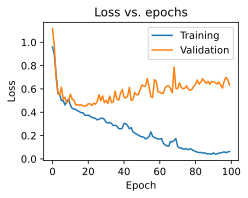

In [33]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

9. **Diagnose the learning curve:**
    - Why is the validation loss much higher than training loss?
    - What's this phenomenon called?
    - Mention 3 methods to reduce this.

- **answer**:
    - ___As the model is so complex so it fits exactly against its training data, so it cannot perform accurately against unseen data
    - ____Overfitting
    - ___ 1- Early stopping 2- Regularization 3- Feature selection

10. **Use one of the methods you mentioned and retrain the model then plot the learning curves**

- **Method**:
    * Here I'm going to use L2 regularizations to solve this problem, **Note**: I've also used early stopping and dropout but found that L2 regularizations is the best of them.

In [34]:
model = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = input_shape, ),
        Dense(128, activation = 'relu', name = 'layer1', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(128, activation = 'relu', name = 'layer2', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(128, activation = 'relu', name = 'layer3', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(128, activation = 'relu', name = 'layer4', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(128, activation = 'relu', name = 'layer5', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(128, activation = 'relu', name = 'layer6', kernel_regularizer=tf.keras.regularizers.l2()),
        Dense(1, name = 'output_layer'),
    ]
)

In [35]:
#### YOUR CODE HERE
# ### START CODE HERE ### ()
# callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
# model = build_model(input_shape)
model.compile(loss='mse', optimizer='adam', metrics = [tf.keras.metrics.MeanAbsoluteError()])
history = model.fit(train_data, train_targets, batch_size = 64, epochs = 100, validation_split = 0.15) #, callbacks=[callback] 

Epoch 1/100
6/6 [==============================] - 2s 126ms/step - loss: 7.3042 - mean_absolute_error: 0.8410 - val_loss: 7.0250 - val_mean_absolute_error: 0.9074
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 6.5792 - mean_absolute_error: 0.8333 - val_loss: 6.3399 - val_mean_absolute_error: 0.9001
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 5.9161 - mean_absolute_error: 0.8257 - val_loss: 5.7122 - val_mean_absolute_error: 0.8891
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 5.3101 - mean_absolute_error: 0.8148 - val_loss: 5.1320 - val_mean_absolute_error: 0.8724
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 4.7510 - mean_absolute_error: 0.7938 - val_loss: 4.5929 - val_mean_absolute_error: 0.8454
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 4.2309 - mean_absolute_error: 0.7627 - val_loss: 4.0777 - val_mean_absolute_error: 0.7895
Epoch 7/100
6/6 [==========

In [36]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6393 - mean_absolute_error: 0.5491 - 34ms/epoch - 17ms/step


[0.6393293738365173, 0.549098014831543]

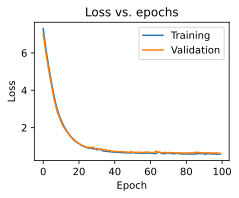

In [37]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Part 3 Batches and Epochs

In this part of the assignment we will create a synthetic data to play with. 
The data will have 2 features and 3 target classes --> multiclass classification problem

In [38]:
# prepare train and test dataset
def prepare_data():
    #  generate classification dataset with 3 centers (labels/classes)
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    
    # plot data
    for class_value in range(3):
        # select indices of points with the class label
        row_ix = np.where(y == class_value)
        # scatter plot for points with a different color
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show plot
    plt.show()

    # one hot encode output variable to convert from integers to binary class
    y = to_categorical(y)

    # split into train and test
    n_train = 500
    X_train, X_test = X[:n_train, :], X[n_train:, :]
    y_train, y_test = y[:n_train], y[n_train:]
    return X_train, y_train, X_test, y_test


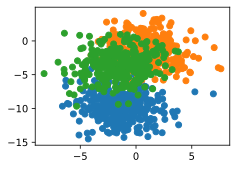

In [39]:
# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()


- **Create a model with:**
    -  1 hidden dense layer (50 neurons), activation relu, , kernel_initializer he_uniform
    - 1 output layer
    - compile the model with SGD (learning rate 0.01 and momentum 0.9) optimizer and categorical crossentropy and accuracy inside build function

In [40]:
def build_model():
    
    ##### YOUR CODE HERE
    # define model
    model = Sequential(
        [
    tf.keras.layers.InputLayer(input_shape = X_train.shape[-1]),
    Dense(50, activation = 'relu', name = 'layer1', kernel_initializer = tf.keras.initializers.HeUniform()),
    Dense(3, activation = 'softmax', name = 'output_layer'),
        ]
    )
   
    # compile model
    sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(), metrics = 'accuracy')    
    
    return model

- Create a function to fit and build the model with different batch sizes

Use epochs = 125

In [41]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    ##### YOUR CODE HERE
    # build model
    model = build_model()
   
    # fit model
    history = model.fit(X_train, y_train, batch_size = n_batch, epochs = 125, validation_data = [X_test, y_test])#, validation_split = 0.15) #, callbacks=[callback] 
    return history

### Hyperparameter Tuning

#### Batch size

##### Size =  1

10. **train for 1 batch size**

In [42]:
### START CODE HERE ###
batch_size = 1
history = fit_model(X_train, y_train, X_test, y_test, batch_size)

###### END CODE HERE

Epoch 1/125
500/500 [==============================] - 3s 5ms/step - loss: 1.7822 - accuracy: 0.5160 - val_loss: 0.9327 - val_accuracy: 0.4940
Epoch 2/125
500/500 [==============================] - 2s 4ms/step - loss: 1.0907 - accuracy: 0.5320 - val_loss: 1.0510 - val_accuracy: 0.5360
Epoch 3/125
500/500 [==============================] - 2s 4ms/step - loss: 1.0449 - accuracy: 0.4600 - val_loss: 0.9381 - val_accuracy: 0.5400
Epoch 4/125
500/500 [==============================] - 2s 4ms/step - loss: 0.9831 - accuracy: 0.4840 - val_loss: 0.9474 - val_accuracy: 0.5320
Epoch 5/125
500/500 [==============================] - 2s 5ms/step - loss: 0.9470 - accuracy: 0.5360 - val_loss: 0.9028 - val_accuracy: 0.5960
Epoch 6/125
500/500 [==============================] - 2s 4ms/step - loss: 0.9334 - accuracy: 0.5360 - val_loss: 0.8787 - val_accuracy: 0.6060
Epoch 7/125
500/500 [==============================] - 2s 4ms/step - loss: 0.9003 - accuracy: 0.5740 - val_loss: 0.8296 - val_accuracy: 0.6080

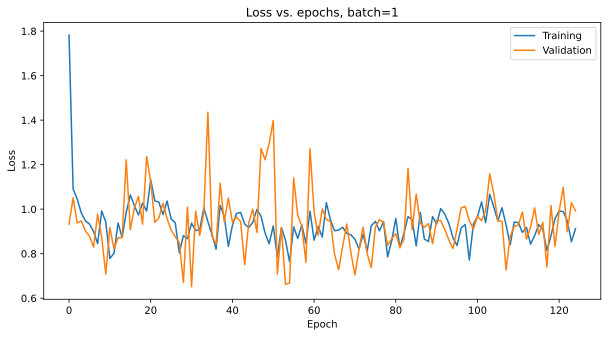

In [43]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

- **Diagnose this curve w.r.t learning rate**:
    - ANSWER: decreasing the learning rate (for example to 0.001), results in less error and less fluctations, and also converges faster. However, increasing it (for example to 0.1) may leads to divergence with a very large loss value, both learning rates graphs are tested and shown below. Therefore, the current learning rate is quite big
- Change learning rate to make this curve better

In [44]:
### Your answer
model = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = X_train.shape[-1]),
        Dense(50, activation = 'relu', name = 'layer1', kernel_initializer = tf.keras.initializers.HeUniform()),
        Dense(3, activation = 'softmax', name = 'output_layer'),
    ])
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(), metrics = 'accuracy')   
history = model.fit(X_train, y_train, batch_size = 1, epochs = 125, validation_data = [X_test, y_test])

Epoch 1/125
500/500 [==============================] - 3s 5ms/step - loss: 2.0578 - accuracy: 0.5520 - val_loss: 0.9102 - val_accuracy: 0.6880
Epoch 2/125
500/500 [==============================] - 2s 4ms/step - loss: 0.8964 - accuracy: 0.6760 - val_loss: 0.5827 - val_accuracy: 0.7860
Epoch 3/125
500/500 [==============================] - 2s 4ms/step - loss: 0.7244 - accuracy: 0.7000 - val_loss: 0.6474 - val_accuracy: 0.7420
Epoch 4/125
500/500 [==============================] - 2s 4ms/step - loss: 0.6032 - accuracy: 0.7500 - val_loss: 0.6473 - val_accuracy: 0.7600
Epoch 5/125
500/500 [==============================] - 2s 4ms/step - loss: 0.5671 - accuracy: 0.7620 - val_loss: 0.4794 - val_accuracy: 0.8100
Epoch 6/125
500/500 [==============================] - 2s 4ms/step - loss: 0.5002 - accuracy: 0.7880 - val_loss: 0.4397 - val_accuracy: 0.8200
Epoch 7/125
500/500 [==============================] - 2s 4ms/step - loss: 0.5077 - accuracy: 0.7860 - val_loss: 0.4572 - val_accuracy: 0.8080

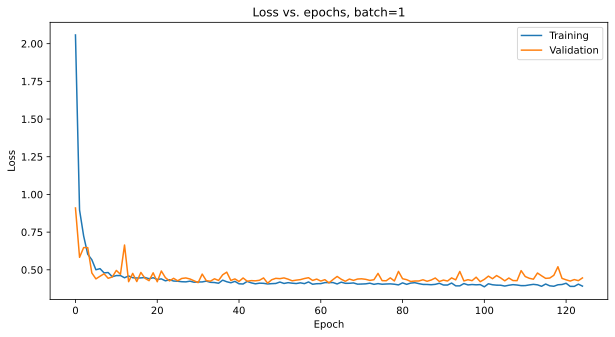

In [45]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [46]:
### Your answer
model = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = X_train.shape[-1]),
        Dense(50, activation = 'relu', name = 'layer1', kernel_initializer = tf.keras.initializers.HeUniform()),
        Dense(3, activation = 'softmax', name = 'output_layer'),
    ])
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(), metrics = 'accuracy')   
history = model.fit(X_train, y_train, batch_size = 1, epochs = 125, validation_data = [X_test, y_test])

Epoch 1/125
500/500 [==============================] - 3s 5ms/step - loss: 155856209444864.0000 - accuracy: 0.4360 - val_loss: 1730172814360576.0000 - val_accuracy: 0.4500
Epoch 2/125
500/500 [==============================] - 2s 4ms/step - loss: 1668479758091943936.0000 - accuracy: 0.4160 - val_loss: 5574504711370833920.0000 - val_accuracy: 0.4760
Epoch 3/125
500/500 [==============================] - 2s 4ms/step - loss: 5739189769687309221888.0000 - accuracy: 0.4440 - val_loss: 6645739041929086107648.0000 - val_accuracy: 0.4540
Epoch 4/125
500/500 [==============================] - 2s 4ms/step - loss: 250302615957567893627994112.0000 - accuracy: 0.4100 - val_loss: 18444936587938233259294457856.0000 - val_accuracy: 0.6280
Epoch 5/125
500/500 [==============================] - 2s 4ms/step - loss: 16465615602332394715406755954688.0000 - accuracy: 0.4660 - val_loss: 14547752712505174314698558930944.0000 - val_accuracy: 0.4980
Epoch 6/125
500/500 [==============================] - 2s 4ms/

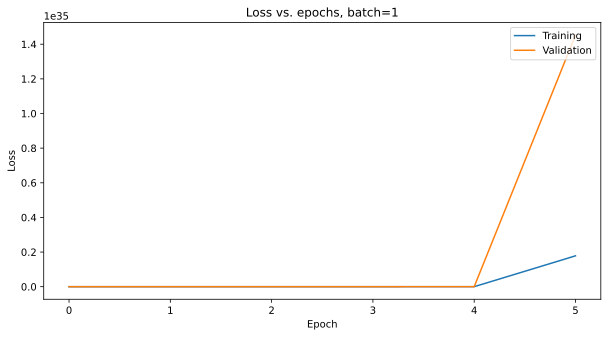

In [47]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  16

10. **Retrain for 16 batch size**

In [48]:
### START CODE HERE ### 
batch_size = 16
history = fit_model(X_train, y_train, X_test, y_test, batch_size)
###### END CODE HERE

Epoch 1/125
32/32 [==============================] - 1s 16ms/step - loss: 2.1531 - accuracy: 0.4840 - val_loss: 2.0304 - val_accuracy: 0.5840
Epoch 2/125
32/32 [==============================] - 0s 6ms/step - loss: 2.7324 - accuracy: 0.5960 - val_loss: 1.8698 - val_accuracy: 0.6860
Epoch 3/125
32/32 [==============================] - 0s 6ms/step - loss: 1.0094 - accuracy: 0.6420 - val_loss: 0.5630 - val_accuracy: 0.7640
Epoch 4/125
32/32 [==============================] - 0s 6ms/step - loss: 0.5911 - accuracy: 0.7340 - val_loss: 0.4983 - val_accuracy: 0.8100
Epoch 5/125
32/32 [==============================] - 0s 6ms/step - loss: 0.5050 - accuracy: 0.7960 - val_loss: 0.5073 - val_accuracy: 0.8160
Epoch 6/125
32/32 [==============================] - 0s 6ms/step - loss: 0.5209 - accuracy: 0.7820 - val_loss: 0.4915 - val_accuracy: 0.8060
Epoch 7/125
32/32 [==============================] - 0s 6ms/step - loss: 0.4805 - accuracy: 0.7880 - val_loss: 0.4802 - val_accuracy: 0.8100
Epoch 8/125


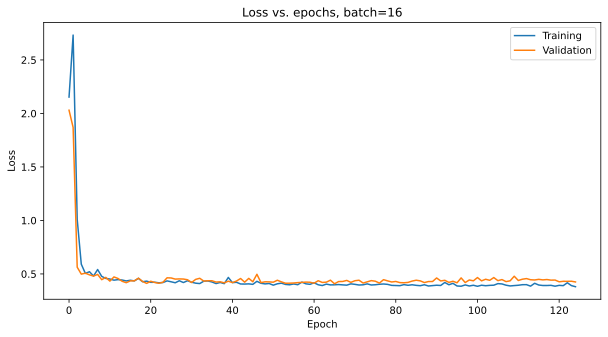

In [49]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  128

10. **Retrain for 128 batch size**

In [50]:
### START CODE HERE ### 
batch_size = 128
history = fit_model(X_train, y_train, X_test, y_test, batch_size)

###### END CODE HERE

Epoch 1/125
4/4 [==============================] - 1s 124ms/step - loss: 4.1072 - accuracy: 0.3540 - val_loss: 4.5428 - val_accuracy: 0.4420
Epoch 2/125
4/4 [==============================] - 0s 24ms/step - loss: 4.4098 - accuracy: 0.4240 - val_loss: 4.5255 - val_accuracy: 0.4200
Epoch 3/125
4/4 [==============================] - 0s 23ms/step - loss: 4.1601 - accuracy: 0.4100 - val_loss: 2.2929 - val_accuracy: 0.5560
Epoch 4/125
4/4 [==============================] - 0s 23ms/step - loss: 2.2552 - accuracy: 0.5700 - val_loss: 2.0156 - val_accuracy: 0.7040
Epoch 5/125
4/4 [==============================] - 0s 23ms/step - loss: 2.2038 - accuracy: 0.6380 - val_loss: 2.3089 - val_accuracy: 0.6780
Epoch 6/125
4/4 [==============================] - 0s 23ms/step - loss: 1.9897 - accuracy: 0.6460 - val_loss: 1.5975 - val_accuracy: 0.6880
Epoch 7/125
4/4 [==============================] - 0s 24ms/step - loss: 1.4724 - accuracy: 0.6580 - val_loss: 1.4800 - val_accuracy: 0.6680
Epoch 8/125
4/4 [==

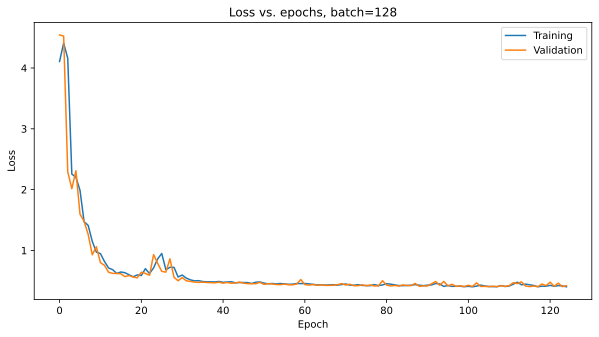

In [51]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Size =  Data

10. **Retrain for length of data batch size**

In [52]:
### START CODE HERE ### 
batch_size = X_train.shape[0]
history = fit_model(X_train, y_train, X_test, y_test, batch_size)

###### END CODE HERE

Epoch 1/125
1/1 [==============================] - 1s 959ms/step - loss: 4.7160 - accuracy: 0.1660 - val_loss: 1.9854 - val_accuracy: 0.3220
Epoch 2/125
1/1 [==============================] - 0s 58ms/step - loss: 1.7227 - accuracy: 0.3260 - val_loss: 3.1065 - val_accuracy: 0.3940
Epoch 3/125
1/1 [==============================] - 0s 57ms/step - loss: 2.9356 - accuracy: 0.3980 - val_loss: 4.0281 - val_accuracy: 0.3800
Epoch 4/125
1/1 [==============================] - 0s 56ms/step - loss: 3.9263 - accuracy: 0.3820 - val_loss: 3.9152 - val_accuracy: 0.3880
Epoch 5/125
1/1 [==============================] - 0s 53ms/step - loss: 3.8178 - accuracy: 0.3860 - val_loss: 2.9736 - val_accuracy: 0.4300
Epoch 6/125
1/1 [==============================] - 0s 59ms/step - loss: 2.8193 - accuracy: 0.4320 - val_loss: 2.7548 - val_accuracy: 0.3340
Epoch 7/125
1/1 [==============================] - 0s 55ms/step - loss: 2.5944 - accuracy: 0.3420 - val_loss: 2.0918 - val_accuracy: 0.3360
Epoch 8/125
1/1 [==

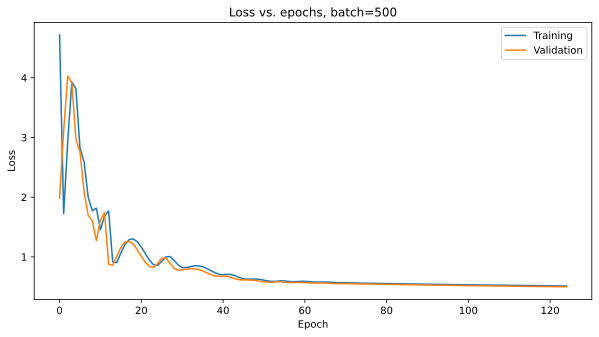

In [53]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

10. **What effect does changing batch size have on learning in terms of convergence and fluctuations?**

**Answer:** increasing batch size makes the convergence slower, and results in less fluctations

#### Learning Rate

batch size 64

- **Use same code for build_model above, add an argument learning rate to change learning rate of optmizer**

In [54]:
def build_model(lr):
    
    ##### YOUR CODE HERE
    # define model
    model = Sequential(
        [
    tf.keras.layers.InputLayer(input_shape = X_train.shape[-1]),
    Dense(50, activation = 'relu', name = 'layer1', kernel_initializer = tf.keras.initializers.HeUniform()),
    Dense(3, activation = 'softmax', name = 'output_layer'),
        ]
    )
   
    # compile model
    sgd = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(), metrics = 'accuracy')    
    
    return model

def fit_model(X_train, y_train, X_test, y_test, n_batch, lr):
    ##### YOUR CODE HERE
    # build model
    model = build_model(lr)
   
    # fit model
    history = model.fit(X_train, y_train, batch_size = n_batch, epochs = 125, validation_data = [X_test, y_test]) 
    return history

##### LR =  0.00001

10. **Retrain for 0.00001 LR**

In [55]:
### START CODE HERE ### ()
# Print the model summary
batch_size = 64
LR = 0.00001
history = fit_model(X_train, y_train, X_test, y_test, batch_size, LR)

Epoch 1/125
8/8 [==============================] - 1s 55ms/step - loss: 1.5905 - accuracy: 0.4500 - val_loss: 1.4230 - val_accuracy: 0.4780
Epoch 2/125
8/8 [==============================] - 0s 12ms/step - loss: 1.4104 - accuracy: 0.4540 - val_loss: 1.2278 - val_accuracy: 0.4820
Epoch 3/125
8/8 [==============================] - 0s 13ms/step - loss: 1.2213 - accuracy: 0.4420 - val_loss: 1.0786 - val_accuracy: 0.4540
Epoch 4/125
8/8 [==============================] - 0s 12ms/step - loss: 1.1076 - accuracy: 0.4720 - val_loss: 1.0094 - val_accuracy: 0.5780
Epoch 5/125
8/8 [==============================] - 0s 12ms/step - loss: 1.0658 - accuracy: 0.5360 - val_loss: 0.9871 - val_accuracy: 0.5700
Epoch 6/125
8/8 [==============================] - 0s 12ms/step - loss: 1.0535 - accuracy: 0.5300 - val_loss: 0.9800 - val_accuracy: 0.5680
Epoch 7/125
8/8 [==============================] - 0s 12ms/step - loss: 1.0487 - accuracy: 0.5260 - val_loss: 0.9758 - val_accuracy: 0.5700
Epoch 8/125
8/8 [===

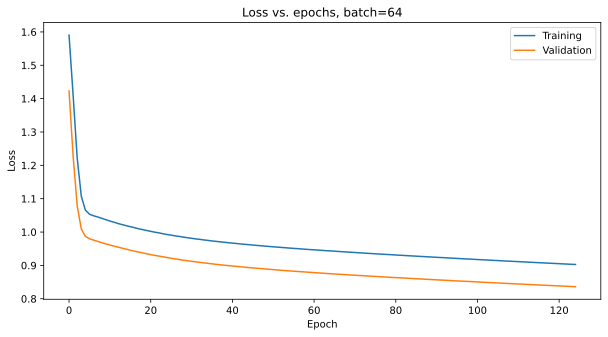

In [56]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### LR =  0.001

10. **Retrain for 0.001 LR**

In [57]:
### START CODE HERE ### ()
LR = 0.001
history = fit_model(X_train, y_train, X_test, y_test, batch_size, LR)

Epoch 1/125
8/8 [==============================] - 1s 61ms/step - loss: 3.7697 - accuracy: 0.3680 - val_loss: 2.5992 - val_accuracy: 0.4140
Epoch 2/125
8/8 [==============================] - 0s 13ms/step - loss: 2.3878 - accuracy: 0.3960 - val_loss: 1.6113 - val_accuracy: 0.5440
Epoch 3/125
8/8 [==============================] - 0s 13ms/step - loss: 1.9838 - accuracy: 0.4680 - val_loss: 1.1667 - val_accuracy: 0.6100
Epoch 4/125
8/8 [==============================] - 0s 13ms/step - loss: 1.2889 - accuracy: 0.5600 - val_loss: 0.9152 - val_accuracy: 0.6700
Epoch 5/125
8/8 [==============================] - 0s 13ms/step - loss: 1.1073 - accuracy: 0.6060 - val_loss: 0.9819 - val_accuracy: 0.6300
Epoch 6/125
8/8 [==============================] - 0s 13ms/step - loss: 0.9481 - accuracy: 0.6140 - val_loss: 0.7756 - val_accuracy: 0.6700
Epoch 7/125
8/8 [==============================] - 0s 14ms/step - loss: 0.8423 - accuracy: 0.6260 - val_loss: 0.7253 - val_accuracy: 0.6540
Epoch 8/125
8/8 [===

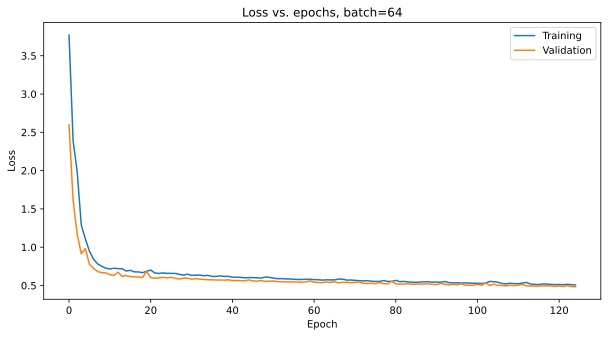

In [58]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### LR =  0.1

10. **Retrain for 0.1 LR**

In [59]:
### START CODE HERE ### ()
LR = 0.1
history = fit_model(X_train, y_train, X_test, y_test, batch_size, LR)

Epoch 1/125
8/8 [==============================] - 1s 60ms/step - loss: 10.6665 - accuracy: 0.4180 - val_loss: 3.2247 - val_accuracy: 0.6540
Epoch 2/125
8/8 [==============================] - 0s 14ms/step - loss: 4.7746 - accuracy: 0.6460 - val_loss: 5.0800 - val_accuracy: 0.6440
Epoch 3/125
8/8 [==============================] - 0s 13ms/step - loss: 2.4189 - accuracy: 0.7020 - val_loss: 0.9307 - val_accuracy: 0.7400
Epoch 4/125
8/8 [==============================] - 0s 13ms/step - loss: 0.9501 - accuracy: 0.7400 - val_loss: 0.8930 - val_accuracy: 0.8080
Epoch 5/125
8/8 [==============================] - 0s 12ms/step - loss: 0.9256 - accuracy: 0.7520 - val_loss: 0.8139 - val_accuracy: 0.8000
Epoch 6/125
8/8 [==============================] - 0s 13ms/step - loss: 0.6736 - accuracy: 0.7940 - val_loss: 0.7358 - val_accuracy: 0.7840
Epoch 7/125
8/8 [==============================] - 0s 13ms/step - loss: 0.6292 - accuracy: 0.7920 - val_loss: 0.6848 - val_accuracy: 0.7860
Epoch 8/125
8/8 [==

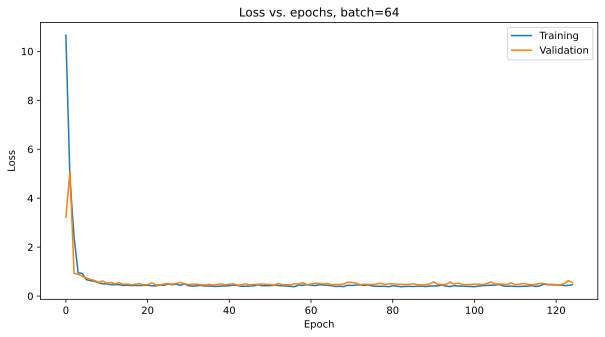

In [60]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs, batch=' +str(batch_size))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

10. **What effect does changing learning rate have on learning?**

**Answer:** increasing learning rate results in faster convergence, but with more fluctations